# Imports

In [24]:
import sklearn
from sklearn import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.1.


# Global variables

In [25]:
TRAINING_DATASET_PATH = 'Data/optdigits.tra'
TEST_DATASET_PATH = 'Data/optdigits.tes'

# Global Functions

In [26]:
# Function to display the number at the index position of the dataset
def display_number(index, dataset_path):
    data = []

    with open(dataset_path, 'r') as f:
        file = csv.reader(f,delimiter=',')
        for line in file:
            matLine = []
            for ligneNumber in range(0,8):
                ligne = []
                for element in range(ligneNumber*8,ligneNumber*8+8):
                    #print("ligneNumber*8 = ",ligneNumber*8,"ligneNumber*8+8 = ",ligneNumber*8+8)
                    ligne.append(int(line[element]))
                    #print("ligne = ", ligne)
                matLine.append(ligne)
                #print("matLine = ",matLine)
            data.append(matLine)

    print("data = ",data) 
    print("data[{}] = ".format(index), data[index])
    plt.axis('off')
    plt.imshow(data[index],cmap='gray')
    plt.show()

# Function to calculate the distance between two matrices
def calculate_distance(matrix1, matrix2):
    return np.sum(np.abs(matrix1-matrix2))


# Loading the Dataset

In [27]:
df_train = pd.read_csv(TRAINING_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

# Training Dataset Head

In [28]:
df_train.head()

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25,0.26
0,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
2,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
3,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
4,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2


# Testing Dataset Head

In [29]:
df_test.head()

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5


# Visualizing the 8x8 matrices

data =  [[[0, 1, 6, 15, 12, 1, 0, 0], [0, 7, 16, 6, 6, 10, 0, 0], [0, 8, 16, 2, 0, 11, 2, 0], [0, 5, 16, 3, 0, 5, 7, 0], [0, 7, 13, 3, 0, 8, 7, 0], [0, 4, 12, 0, 1, 13, 5, 0], [0, 0, 14, 9, 15, 9, 0, 0], [0, 0, 6, 14, 7, 1, 0, 0]], [[0, 0, 10, 16, 6, 0, 0, 0], [0, 7, 16, 8, 16, 5, 0, 0], [0, 11, 16, 0, 6, 14, 3, 0], [0, 12, 12, 0, 0, 11, 11, 0], [0, 12, 12, 0, 0, 8, 12, 0], [0, 7, 15, 1, 0, 13, 11, 0], [0, 0, 16, 8, 10, 15, 3, 0], [0, 0, 10, 16, 15, 3, 0, 0]], [[0, 0, 8, 15, 16, 13, 0, 0], [0, 1, 11, 9, 11, 16, 1, 0], [0, 0, 0, 0, 7, 14, 0, 0], [0, 0, 3, 4, 14, 12, 2, 0], [0, 1, 16, 16, 16, 16, 10, 0], [0, 2, 12, 16, 10, 0, 0, 0], [0, 0, 2, 16, 4, 0, 0, 0], [0, 0, 9, 14, 0, 0, 0, 0]], [[0, 0, 0, 3, 11, 16, 0, 0], [0, 0, 5, 16, 11, 13, 7, 0], [0, 3, 15, 8, 1, 15, 6, 0], [0, 11, 16, 16, 16, 16, 10, 0], [0, 1, 4, 4, 13, 10, 2, 0], [0, 0, 0, 0, 15, 4, 0, 0], [0, 0, 0, 3, 16, 0, 0, 0], [0, 0, 0, 1, 15, 2, 0, 0]], [[0, 0, 5, 14, 4, 0, 0, 0], [0, 0, 13, 8, 0, 0, 0, 0], [0, 3, 14, 4, 0, 0, 0, 

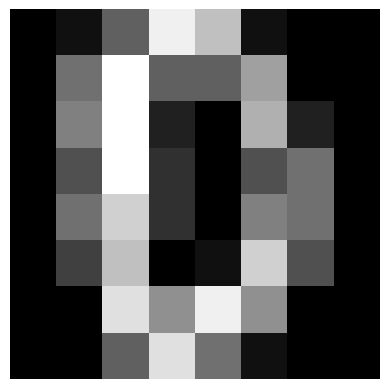

In [30]:
display_number(0, TRAINING_DATASET_PATH)

data =  [[[0, 1, 6, 15, 12, 1, 0, 0], [0, 7, 16, 6, 6, 10, 0, 0], [0, 8, 16, 2, 0, 11, 2, 0], [0, 5, 16, 3, 0, 5, 7, 0], [0, 7, 13, 3, 0, 8, 7, 0], [0, 4, 12, 0, 1, 13, 5, 0], [0, 0, 14, 9, 15, 9, 0, 0], [0, 0, 6, 14, 7, 1, 0, 0]], [[0, 0, 10, 16, 6, 0, 0, 0], [0, 7, 16, 8, 16, 5, 0, 0], [0, 11, 16, 0, 6, 14, 3, 0], [0, 12, 12, 0, 0, 11, 11, 0], [0, 12, 12, 0, 0, 8, 12, 0], [0, 7, 15, 1, 0, 13, 11, 0], [0, 0, 16, 8, 10, 15, 3, 0], [0, 0, 10, 16, 15, 3, 0, 0]], [[0, 0, 8, 15, 16, 13, 0, 0], [0, 1, 11, 9, 11, 16, 1, 0], [0, 0, 0, 0, 7, 14, 0, 0], [0, 0, 3, 4, 14, 12, 2, 0], [0, 1, 16, 16, 16, 16, 10, 0], [0, 2, 12, 16, 10, 0, 0, 0], [0, 0, 2, 16, 4, 0, 0, 0], [0, 0, 9, 14, 0, 0, 0, 0]], [[0, 0, 0, 3, 11, 16, 0, 0], [0, 0, 5, 16, 11, 13, 7, 0], [0, 3, 15, 8, 1, 15, 6, 0], [0, 11, 16, 16, 16, 16, 10, 0], [0, 1, 4, 4, 13, 10, 2, 0], [0, 0, 0, 0, 15, 4, 0, 0], [0, 0, 0, 3, 16, 0, 0, 0], [0, 0, 0, 1, 15, 2, 0, 0]], [[0, 0, 5, 14, 4, 0, 0, 0], [0, 0, 13, 8, 0, 0, 0, 0], [0, 3, 14, 4, 0, 0, 0, 

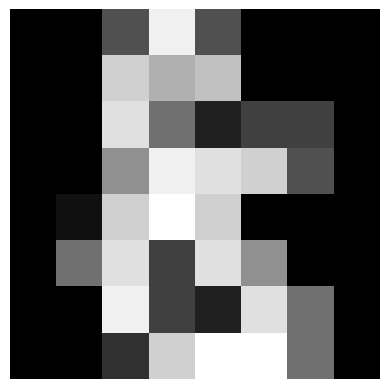

In [31]:
display_number(2001, TRAINING_DATASET_PATH)

In [32]:
point1 = df_train.iloc[2, :-1].values
point2 = df_train.iloc[3, :-1].values
print("point1 = ", point1)
distance = calculate_distance(point1, point2)
print("Distance between point 1 and point 2 = ", distance)

point1 =  [ 0  0  0  3 11 16  0  0  0  0  5 16 11 13  7  0  0  3 15  8  1 15  6  0
  0 11 16 16 16 16 10  0  0  1  4  4 13 10  2  0  0  0  0  0 15  4  0  0
  0  0  0  3 16  0  0  0  0  0  0  1 15  2  0  0]
Distance between point 1 and point 2 =  291


# 2- K-Means Analysis 

## Initialize the Variables

In [69]:
wcss = []  # WCSS (Within-Cluster Sum of Square)
silhouette_scores = []
MINIMUM_NB_CLUSTERS = 2
MAXIMUM_NB_CLUSTERS = 60

## K-Means clustering

In [70]:
for k in range(MINIMUM_NB_CLUSTERS, MAXIMUM_NB_CLUSTERS):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_train)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_train, kmeans.labels_))

/home/christian/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/christian/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/christian/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/christian/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

# 3- Display the Results 

## Plotting WCSS to find the elbow point

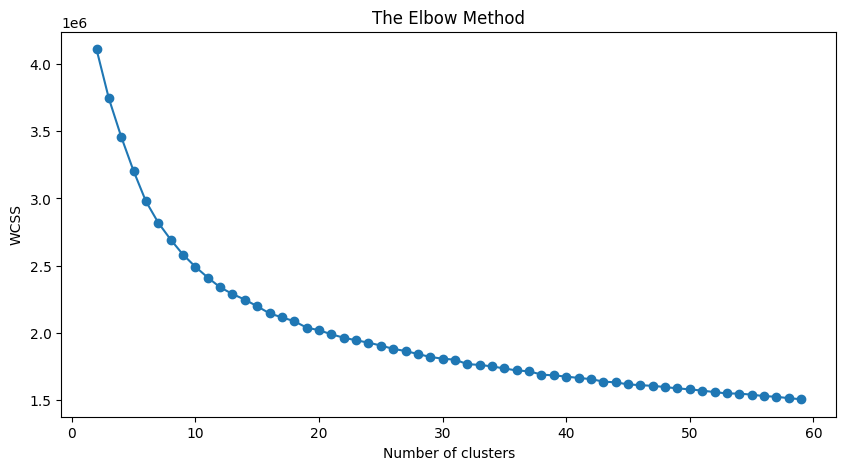

In [71]:
plt.figure(figsize=(10,5))
plt.plot(range(MINIMUM_NB_CLUSTERS, MAXIMUM_NB_CLUSTERS), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Plotting Silhouette scores

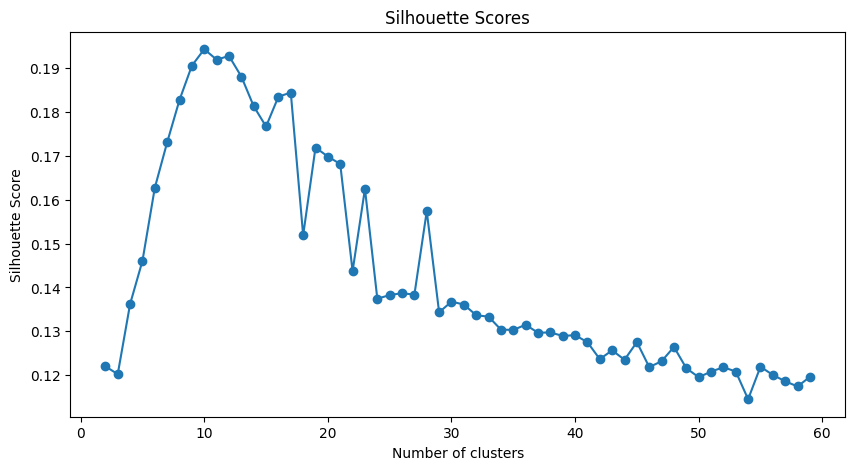

In [72]:
plt.figure(figsize=(10,5))
plt.plot(range(MINIMUM_NB_CLUSTERS, MAXIMUM_NB_CLUSTERS), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()